# Atlas Tyres wishes to increase their tyre sales and improve their brand.
The data given is based on the cost and number of sales for the period of 
January 2019 - June 2019

Visualization of the data can be in terms of:
1. Inwards vs Outwards sales cost for each tyre type
2. Count of number of tyres sold per month for the 6 months (total sum of tyres per month)
3. Highest/lowest selling tyres in count form
4. Highest/lowest selling tyres in cost form

In [1]:
import pandas as pd
import numpy as np
import warnings
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

#import fastai

In [96]:
pd.read_csv('Copy_ATLAS_TYRES_Stock Summary.csv', nrows=4)

,Unnamed: 0,Opening Balance,Unnamed: 2,Unnamed: 3,Inwards,Unnamed: 5,Unnamed: 6,Outwards,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Closing Balance,Unnamed: 15,Unnamed: 16
0,NaN,Quantity,Rate,Value,Quantity,Rate,Value,Quantity,Rate,Value,Gross Value,Consumption,Gross Profit,Perc %,Quantity,Rate,Value
1,155R12C ATL,300,"3,100","930,000",NaN,NaN,NaN,149,"3,130","466,300","466,300","461,900","4,400",0.94 %,151,"3,100","468,100"
2,175/70R13 GREEN ATL,290,"3,000","870,000",NaN,NaN,NaN,46,"3,026","139,200","139,200","138,000","1,200",0.86 %,244,"3,000","732,000"
3,175/70R14 ATL,186,"3,100","576,600",NaN,NaN,NaN,67,"3,131","209,800","209,800","207,700","2,100",1.00 %,119,"3,100","368,900"


In [97]:
df = pd.read_csv('Copy_ATLAS_TYRES_Stock Summary.csv')

In [98]:
df.head(5)

,Unnamed: 0,Opening Balance,Unnamed: 2,Unnamed: 3,Inwards,Unnamed: 5,Unnamed: 6,Outwards,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Closing Balance,Unnamed: 15,Unnamed: 16
0,NaN,Quantity,Rate,Value,Quantity,Rate,Value,Quantity,Rate,Value,Gross Value,Consumption,Gross Profit,Perc %,Quantity,Rate,Value
1,155R12C ATL,300,"3,100","930,000",NaN,NaN,NaN,149,"3,130","466,300","466,300","461,900","4,400",0.94 %,151,"3,100","468,100"
2,175/70R13 GREEN ATL,290,"3,000","870,000",NaN,NaN,NaN,46,"3,026","139,200","139,200","138,000","1,200",0.86 %,244,"3,000","732,000"
3,175/70R14 ATL,186,"3,100","576,600",NaN,NaN,NaN,67,"3,131","209,800","209,800","207,700","2,100",1.00 %,119,"3,100","368,900"
4,175R13C ATL,686,"4,000","2,744,000",NaN,NaN,NaN,99,"3,992","395,200","395,200","396,000",(800),-0.20 %,587,"4,000","2,348,000"


In [5]:
#df.info

In [99]:
df.columns

Index(['Unnamed: 0', 'Opening Balance', 'Unnamed: 2', 'Unnamed: 3', 'Inwards',
       'Unnamed: 5', 'Unnamed: 6', 'Outwards', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Closing Balance', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

Seeing that most columns have null values, I remove Opening Balance,inwards and Closing Balance columns

Outwards clearly indicates the tyres sold out in Jan-June



In [100]:
#df.drop(colname, axis=1) (or del df[colname]) is the correct method to use to delete a column.
#df.drop(df.columns[[0, 1, 3]], axis=1)  # df.columns is zero-based pd.Index 

outward_tyre = df.drop(df.columns[[1,2,3,4,5,6,14,15,16]], axis=1)

In [101]:
outward_tyre.head(5)

,Unnamed: 0,Outwards,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Quantity,Rate,Value,Gross Value,Consumption,Gross Profit,Perc %
1,155R12C ATL,149,"3,130","466,300","466,300","461,900","4,400",0.94 %
2,175/70R13 GREEN ATL,46,"3,026","139,200","139,200","138,000","1,200",0.86 %
3,175/70R14 ATL,67,"3,131","209,800","209,800","207,700","2,100",1.00 %
4,175R13C ATL,99,"3,992","395,200","395,200","396,000",(800),-0.20 %


In [102]:
outward_tyre.info


<bound method DataFrame.info of                    Unnamed: 0    Outwards Unnamed: 8     Unnamed: 9  \
0                         NaN   Quantity       Rate          Value    
1                 155R12C ATL        149      3,130        466,300    
2         175/70R13 GREEN ATL         46      3,026        139,200    
3               175/70R14 ATL         67      3,131        209,800    
4                 175R13C ATL         99      3,992        395,200    
5         185/65R15 GREEN ATL         33      4,018        132,600    
6               185/70R13 ATL        944      3,139      2,963,400    
7         185/70R14 GREEN ATL        713      3,270      2,331,800    
8          185/70R14 LMA3 INF        449      3,401      1,527,200    
9                185R14C  ATL         23      4,591        105,600    
10              195/65R15 ATL        740      4,014      2,970,000    
11           195R14C LMC8 ATL         75      4,800        360,000    
12           195R14C LMC8 INF         64     

In [147]:
outward_tyre.iloc[0]

Tyre_type                  NaN
Quantity             Quantity 
Rate                     Rate 
Value                   Value 
Gross_Value       Gross Value 
Consumption       Consumption 
Gross_Profit     Gross Profit 
Percentage              Perc %
Name: 0, dtype: object

In [148]:
outward_tyre.columns

Index(['Tyre_type', 'Quantity', 'Rate', 'Value', 'Gross_Value', 'Consumption',
       'Gross_Profit', 'Percentage'],
      dtype='object')

Rename columns so first row reads column names instead

In [149]:
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
outward_tyre.rename(columns={'Unnamed: 0': 'Tyre_type', 'Outwards': 'Quantity', 'Unnamed: 8': 'Rate', 'Unnamed: 9': 'Value', 'Unnamed: 10': 'Gross_Value', 'Unnamed: 11': 'Consumption', 'Unnamed: 12': 'Gross_Profit', 'Unnamed: 13': 'Percentage'}, inplace=True)

In [150]:
outward_tyre.head(15)

,Tyre_type,Quantity,Rate,Value,Gross_Value,Consumption,Gross_Profit,Percentage
0,NaN,Quantity,Rate,Value,Gross Value,Consumption,Gross Profit,Perc %
1,155R12C ATL,149,"3,130","466,300","466,300","461,900","4,400",0.94 %
2,175/70R13 GREEN ATL,46,"3,026","139,200","139,200","138,000","1,200",0.86 %
3,175/70R14 ATL,67,"3,131","209,800","209,800","207,700","2,100",1.00 %
4,175R13C ATL,99,"3,992","395,200","395,200","396,000",(800),-0.20 %
5,185/65R15 GREEN ATL,33,"4,018","132,600","132,600","132,000",600,0.45 %
6,185/70R13 ATL,944,"3,139","2,963,400","2,963,400","3,020,800","(57,400)",-1.94 %
7,185/70R14 GREEN ATL,713,"3,270","2,331,800","2,331,800","2,424,200","(92,400)",-3.96 %
8,185/70R14 LMA3 INF,449,"3,401","1,527,200","1,527,200","1,526,600",600,0.04 %
9,185R14C ATL,23,"4,591","105,600","105,600","110,400","(4,800)",-4.55 %


In [80]:
#data.columns = [col.replace(',', '') for col in data.columns]
#outward_tyre.columns = [col.replace(',', '') for col in outward_tyre.columns]
#outward_tyre.str.replace(',', '')
#outward_tyre['Rate'].str.replace('NaN', '0')


In [151]:
#Now i drop the top row as it's a duplicate of row names
outward_tyre_col = outward_tyre.drop(outward_tyre.index[0])

In [181]:
outward_tyre_col.head(22)

,Tyre_type,Quantity,Rate,Value,Gross_Value,Consumption,Gross_Profit,Percentage
1,155R12C ATL,149,"3,130","466,300","466,300","461,900","4,400",0.94 %
2,175/70R13 GREEN ATL,46,"3,026","139,200","139,200","138,000","1,200",0.86 %
3,175/70R14 ATL,67,"3,131","209,800","209,800","207,700","2,100",1.00 %
4,175R13C ATL,99,"3,992","395,200","395,200","396,000",(800),-0.20 %
5,185/65R15 GREEN ATL,33,"4,018","132,600","132,600","132,000",600,0.45 %
6,185/70R13 ATL,944,"3,139","2,963,400","2,963,400","3,020,800","(57,400)",-1.94 %
7,185/70R14 GREEN ATL,713,"3,270","2,331,800","2,331,800","2,424,200","(92,400)",-3.96 %
8,185/70R14 LMA3 INF,449,"3,401","1,527,200","1,527,200","1,526,600",600,0.04 %
9,185R14C ATL,23,"4,591","105,600","105,600","110,400","(4,800)",-4.55 %
10,195/65R15 ATL,740,"4,014","2,970,000","2,970,000","3,015,774","(45,774)",-1.54 %


In [182]:
#df.reset_index(level=0, inplace=True)
#gapminder = gapminder.set_index("country")
df2 = outward_tyre_col.set_index('Tyre_type')
#outward_tyre = df.drop(df.columns[[1,2,3,4,5,6,14,15,16]], axis=1)

#Dropped columns on percentage and Gross_profit
df2 = df2.drop(outward_tyre_col.columns[[6,7]], axis=1)

In [191]:
cols = ['Quantity', 'Rate', 'Value', 'Gross_Value', 'Consumption']

df2[cols].astype(str)
df2[cols].replace(',', '')
df2[cols].replace('nan', '0')
#df2[cols].replace('', '')

#df2[cols] =  outward_tyre_col[cols].astype(int)


,Quantity,Rate,Value,Gross_Value,Consumption
Tyre_type,,,,,
155R12C ATL,149,"3,130","466,300","466,300","461,900"
175/70R13 GREEN ATL,46,"3,026","139,200","139,200","138,000"
175/70R14 ATL,67,"3,131","209,800","209,800","207,700"
175R13C ATL,99,"3,992","395,200","395,200","396,000"
185/65R15 GREEN ATL,33,"4,018","132,600","132,600","132,000"
185/70R13 ATL,944,"3,139","2,963,400","2,963,400","3,020,800"
185/70R14 GREEN ATL,713,"3,270","2,331,800","2,331,800","2,424,200"
185/70R14 LMA3 INF,449,"3,401","1,527,200","1,527,200","1,526,600"
185R14C ATL,23,"4,591","105,600","105,600","110,400"


In [193]:
#group by a specific column value- tyre_type and their quantity for starters

#tyre_quantity = outward_tyre.groupby(['Tyre_type', 'Quantity'])
#tyre_quantity.head(3)
df2.columns

Index(['Quantity', 'Rate', 'Value', 'Gross_Value', 'Consumption'], dtype='object')

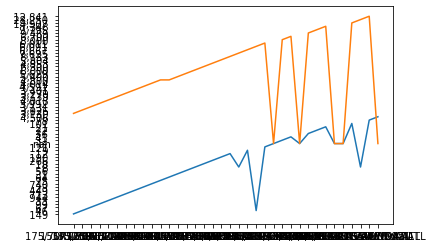

In [207]:
#plt.plot(data.index, data.amount)

plt.plot(df2.index, df2.Quantity, df2.Rate)